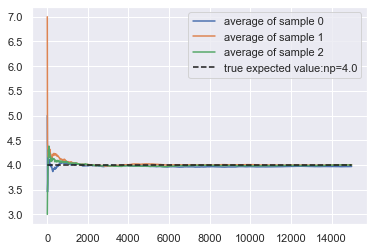

In [4]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

n = 10
p = 0.4
sample_size = 15000
expected_value = n * p
N_samples = range(1, sample_size, 10)

for k in range(3):
    binom_rv = binom(n=n, p=p)
    X = binom_rv.rvs(size=sample_size)
    sample_average = [X[:i].mean() for i in N_samples]
    plt.plot(N_samples, sample_average,
        label='average of sample {}'.format(k))

plt.plot(N_samples, expected_value * np.ones_like(sample_average),
    ls='--', label='true expected value:np={}'.format(n*p), c='k')

plt.legend()
plt.show()

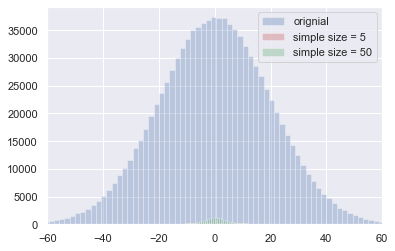

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
from scipy.stats import norm

norm_rvs = norm(loc=0, scale=20).rvs(size=1000000)
plt.hist(norm_rvs, alpha=0.3, color='b', bins=100, label='orignial')

mean_rarry = []
for i in range(10000):
    sample = np.random.choice(norm_rvs, size=5, replace=True)
    mean_rarry.append(np.mean(sample))
plt.hist(mean_rarry, alpha=0.3, color='r', bins=100, label='simple size = 5')

for i in range(10000):
    sample = np.random.choice(norm_rvs, size=50, replace=True)
    mean_rarry.append(np.mean(sample))
plt.hist(mean_rarry, alpha=0.3, color='g', bins=100, label='simple size = 50')

plt.gca().axes.set_xlim(-60, 60)
plt.legend(loc='best')
plt.show()

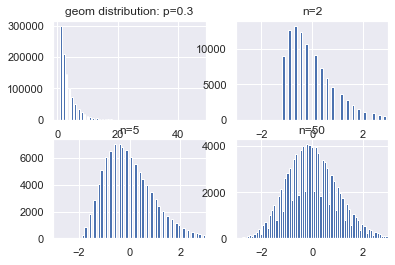

In [7]:
import numpy as np
from scipy.stats import geom
import matplotlib.pyplot as plt
import seaborn

seaborn.set()

fig, ax  = plt.subplots(2, 2)

geom_rv = geom(0.3)
geom_rvs = geom_rv.rvs(size=1000000)
mean, var, skew, hurt = geom_rv.stats(moments='mvsk')
ax[0, 0].hist(geom_rvs, bins=100)
ax[0, 0].set_title('geom distribution: p=0.3')
n_array = [0, 2, 5, 50]

for i in range(1, 4):
    Z_array = []
    n = n_array[i]
    for j in range(100000):
        sample = np.random.choice(geom_rvs, n)
        Z_array.append((sum(sample)-n * mean) / np.sqrt(n * var))
    ax[i//2, i%2].hist(Z_array, bins=100)
    ax[i//2, i%2].set_title('n={}'.format(n))
    ax[i//2, i%2].set_xlim(-3, 3)

plt.show() 
